In [68]:
from datetime import date, datetime, time, timedelta
import pysrt
from textblob import TextBlob
import matplotlib 
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(16.0,9.0)
style.use('fivethirtyeight')

In [69]:
def create_intervals(start, end, delta):
    current=start
    while current<=end:
        current=(datetime.combine(date.today(),current)+delta).time()
        yield current

In [79]:
def sentiment_anal(file='/home/berhe/Desktop/LIMSI/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt', delta=2):
    subs=pysrt.open(file,encoding='iso-8859-1')
    n=len(subs)
    intervals=[]
    start=time(0,0,0)
    end=subs[-1].end.to_time()
    delta=timedelta(minutes=delta)
    for results in create_intervals(start, end, delta):
        intervals.append(results)
        
    sentiments=[]
    index=0
    m=len(intervals)
    for i in range(m):
        text=""
        for j in range(index,n):
            if subs[j].end.to_time()<intervals[i]:
                text+=subs[j].text_without_tags + " "
            else:
                break
        blob=TextBlob(text)
        pol=blob.sentiment.polarity
        sentiments.append(pol)
        index =j
    intervals.insert(0,time(0,0,0))
    sentiments.insert(0,0.0)
    for k in range(0,n):
        #print(intervals[k])
        print(subs[k].text)
    return (intervals, sentiments)

In [80]:
x,y=sentiment_anal('/home/berhe/Desktop/LIMSI/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt')

(Gate rumbling, chains rattling)
(Horse snorts)
(Rumbling, chain rattling)
(Wind whistling)
- Easy, boy.
- (Grunts)
(Horse whinnies)
(Man) What do you expect?
They're savages.
One lot steals a goat from another lot,
before you know it
they're ripping each other to pieces.
I've never seen wildlings do a thing like this.
I never seen a thing like this,
not ever in my life.
- (Horse snorts)
- How close did you get?
- Close as any man would.
- We should head back to the Wall.
Do the dead frighten you?
Our orders were to track the wildlings.
We tracked them.
They wonât trouble us no more.
You donât think he'll ask us how they died?
Get back on your horse.
(Sighs, mutters)
Whatever did it to them
could do it to us.
They even killed the children.
It's a good thing we're not children.
You want to run away south,
run away.
Of course,
they will behead you as a deserter.
If I don't catch you ï¬rst.
Get back on your horse.
I won't say it again.
(Shrill animal ll)
Your dead men seem
to have mo

In [55]:
def average_sentiment(y):
    avg=float(sum(y))/len(y)
    return avg

Text(0.5,1.03,u'Avg Sen 0.1269')

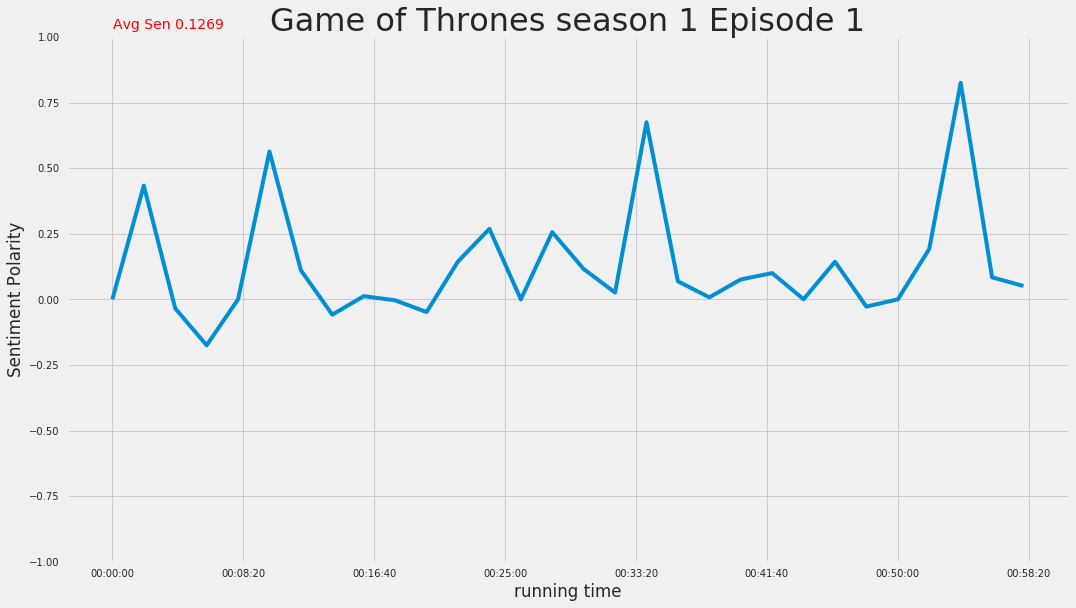

In [65]:
x,y=sentiment_anal('/home/berhe/Desktop/LIMSI/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt')
fig,ax=plt.subplots(squeeze=False)
plt.plot(x,y)
plt.title("Game of Thrones season 1 Episode 1",fontsize=32)
plt.ylim((-1,1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("running time")
plt.text(.5, 1.03, "Avg Sen " + str(round(average_sentiment(y),4)),color="red")
#ttl=ax.title
#ttl.set_position(.5, 1.05)